# Lending Club Loan Data Analysis

**Objective:** Create a model that predicts whether or not a loan will be default using the historical data.

**Problem Statement:**

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

**Domain:** Finance

**Analysis to be done:** Perform data preprocessing and build a deep learning prediction model.

**Content:**

Dataset columns and definition:

- **credit.policy:** 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

- **purpose:** The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

- **int.rate:** The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

- **installment:** The monthly installments owed by the borrower if the loan is funded.

- **log.annual.inc:** The natural log of the self-reported annual income of the borrower.

- **dti:** The debt-to-income ratio of the borrower (amount of debt divided by annual income).

- **fico:** The FICO credit score of the borrower.

- **days.with.cr.line:** The number of days the borrower has had a credit line.

- **revol.bal:** The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

- **revol.util:** The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

- **inq.last.6mths:** The borrower's number of inquiries by creditors in the last 6 months.

- **delinq.2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

- **pub.rec:** The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

**Steps to perform:**

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

**Tasks:**

1. Feature Transformation

    - Transform categorical values into numerical values (discrete)

2. Exploratory data analysis of different factors of the dataset.

3. Additional Feature Engineering

    - You will check the correlation between features and will drop those features which have a strong correlation
    - This will help reduce the number of features and will leave you with the most relevant features

4. Modeling

  - After applying EDA and feature engineering, you are now ready to build the predictive models
  - In this part, you will create a deep learning model using Keras with Tensorflow backend


## Data Preparation

> Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

> Load data

In [2]:
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [4]:
len(df)

9578

> Info of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Only `purpose` column is categorical. As unique elements in `purpose` are non-ordinal, one hot encoding can be used for further processing / modelling.

> Description of data

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


> Check data for missing values

In [7]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

There are no missing values.

> Check data for `NaN` values

In [8]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

There are no null values.

> Check data for duplicates

In [9]:
df.duplicated().sum()

0

There are no duplicate rows.

> Unique values of features

In [10]:
df.nunique()

credit.policy           2
purpose                 7
int.rate              249
installment          4788
log.annual.inc       1987
dti                  2529
fico                   44
days.with.cr.line    2687
revol.bal            7869
revol.util           1035
inq.last.6mths         28
delinq.2yrs            11
pub.rec                 6
not.fully.paid          2
dtype: int64

## Exploratory Data Analysis

In [11]:
print(f"Number of features in data is {len(df.columns)}")

Number of features in data is 14


In [12]:
df_numeric = df.select_dtypes(include='number')
df_numeric.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

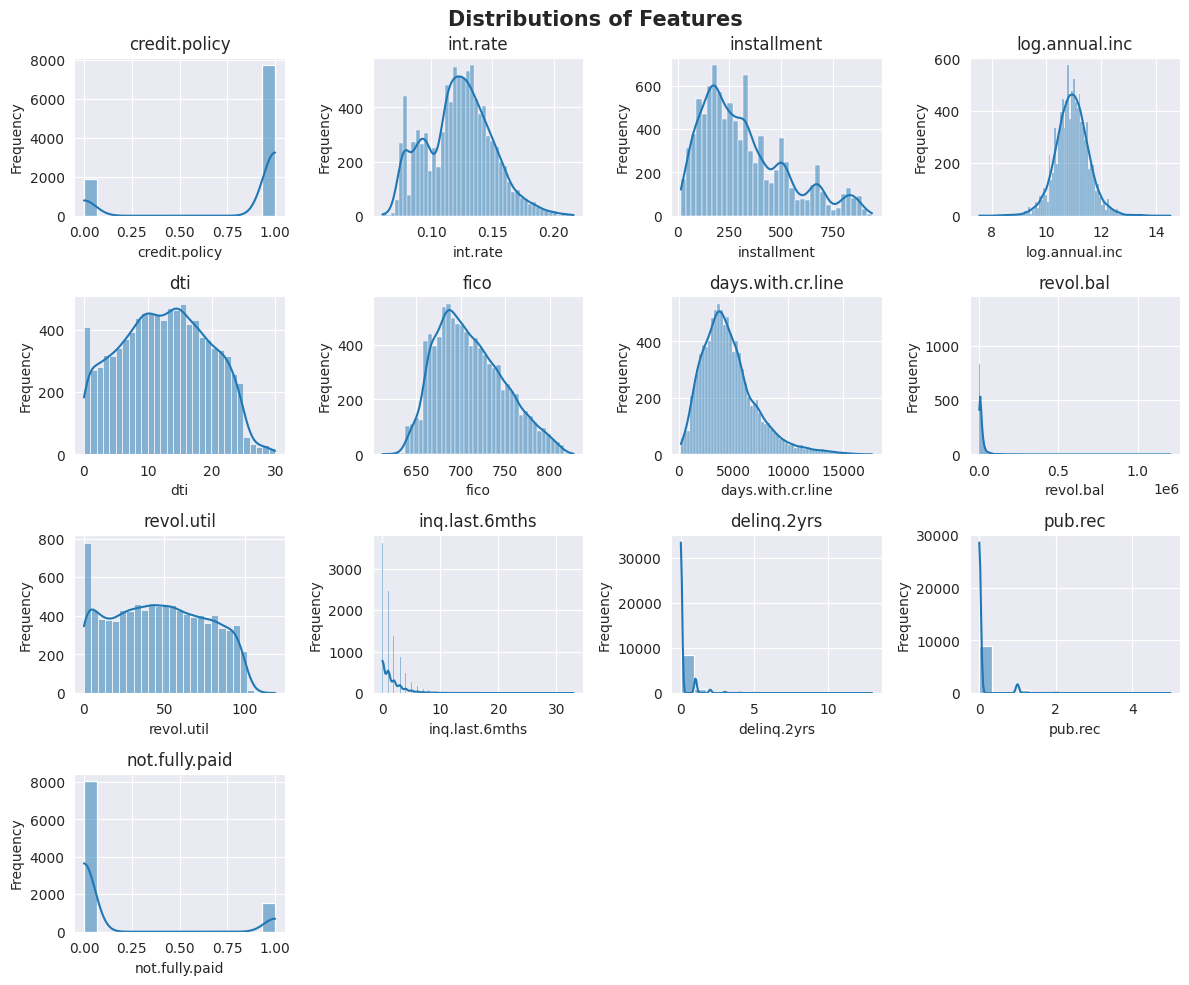

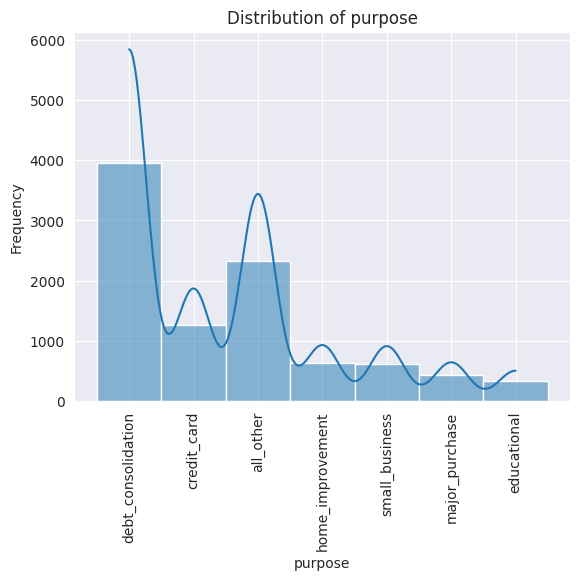

In [13]:
fig = plt.figure(figsize=(12, 12))
for i, feature in enumerate(df_numeric.columns, start=1):
    plt.subplot(5, 4, i) # There are 11 numeric features
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

fig.suptitle("Distributions of Features", fontweight='bold', fontsize=15)
plt.tight_layout()
plt.show()

sns.histplot(df['purpose'], kde=True)
plt.title(f"Distribution of purpose")
plt.xlabel("purpose")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

**Observations:**

*Distributions of Features:*

Feature          | Distribution             |
-----------------|--------------------------|
credit.policy    | Bernoulli Distribution   |
int.rate         |Non-symmetric Multimodel  |
installment      |Non-symmetric Multimodel  |
log.annual.inc   | Normal                   |
dti              |Non-symmetric Bimodel     |
fico             |Slightly Positively Skewed|
days.with.cr.line|Positively Skewed         |
revol.bal        |Positively Skewed         |
revol.util       |Non-symmetric Multimodel  |
inq.last.6mths   |Positively Skewed         |
delinq.2yrs      |Positively Skewed         |
pub.rec          |Positively Skewed         |
not.fully.paid   |Bernoulli Distribution    |
purpose          |Non-symmetric Multimodel  |

## Feature Engineering

> Only `purpose` column is categorical. As unique elements in `purpose` are non-ordinal, one hot encoding can be used for further processing / modelling.

In [14]:
df = pd.get_dummies(df, columns=['purpose'], drop_first=True, prefix='pur', dtype='int')
df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,pur_credit_card,pur_debt_consolidation,pur_educational,pur_home_improvement,pur_major_purchase,pur_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


> **Correlation of Features:**

In [15]:
corr = df.corr()
corr

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,pur_credit_card,pur_debt_consolidation,pur_educational,pur_home_improvement,pur_major_purchase,pur_small_business
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


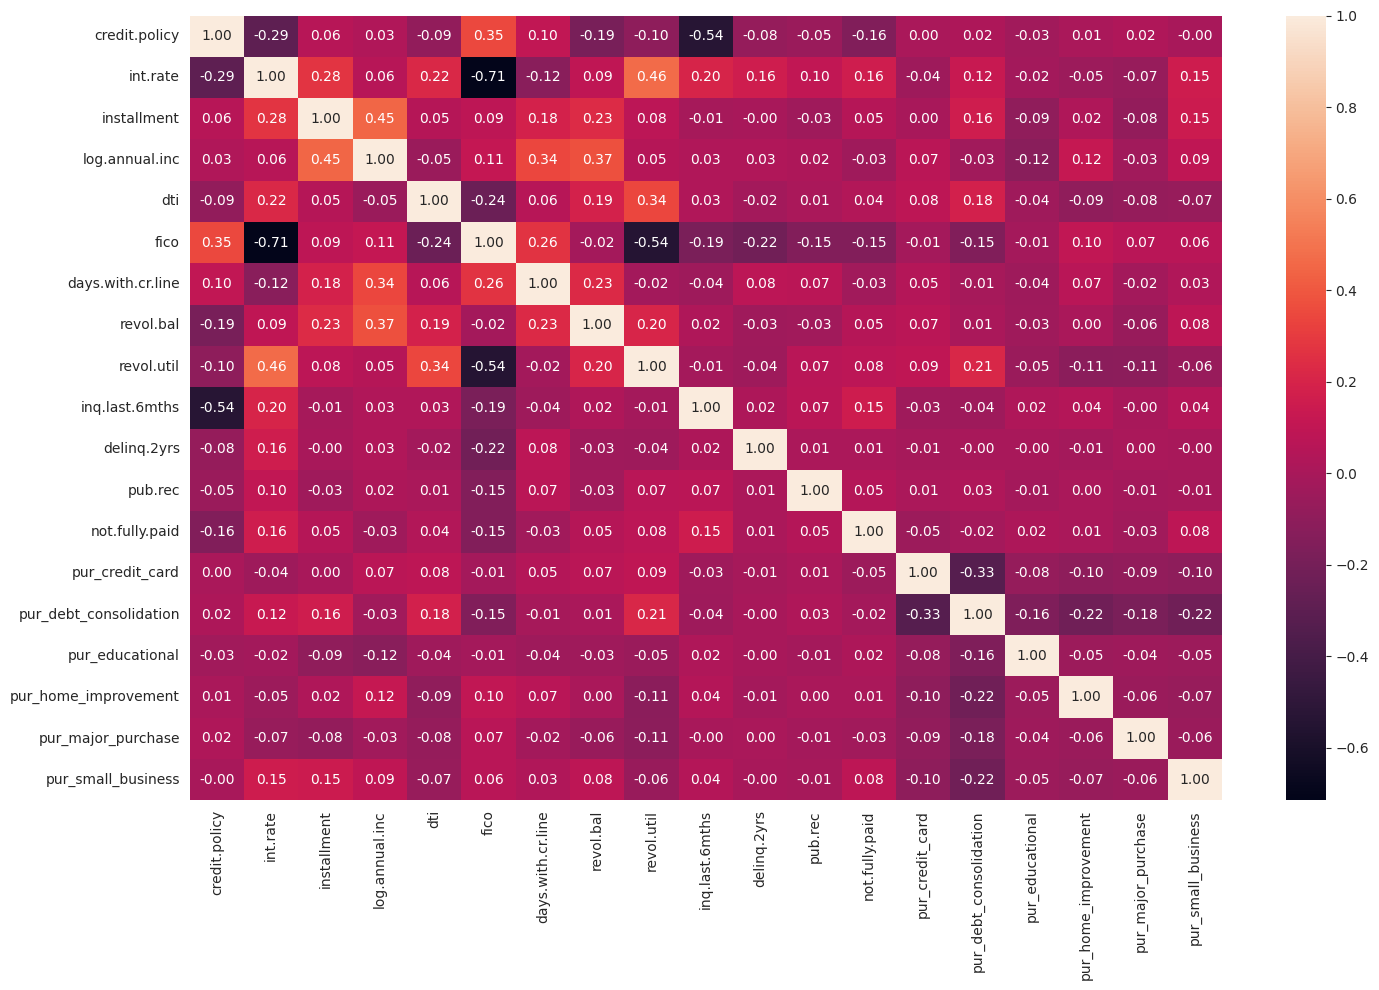

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), fmt='.2f', cmap="rocket", annot=True)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observations:**

**Moderately positively correlated features:**

Feature1 | Feature2 | Corr |
---------|----------|------|
`int.rate` | `revol.util`| `0.46`|
`installment` | `log.annual.inc` | `0.45`|
`log.annual.inc` | `revol.bal` | `0.37`|


**Strongly negatively correlated features:**

Feature1 | Feature2 | Corr |
---------|----------|------|
`int.rate` | `fico` | `-0.71`|
`revol.util`|`fico`|`-0.54`|
`credit.policy`|`inq.last.6mths`|`-0.54`|

`fico` is strongly negatively correlated with `int.rate`.

In [17]:
# Function to plot feature relations

def plot_feature_relations(feature1, feature2, rows, cols, plot_num, fontsize):
  plt.subplot(rows, cols, plot_num)
  sns.scatterplot(x=df[feature1], y=df[feature2], s=10, hue=df['not.fully.paid'])
  plt.title(f"{feature2} vs {feature1}", fontweight='bold', fontsize=fontsize)
  plt.xlabel(feature1, fontsize=fontsize)
  plt.ylabel(feature2, fontsize=fontsize)

> **Visualizations for positively correlated features**

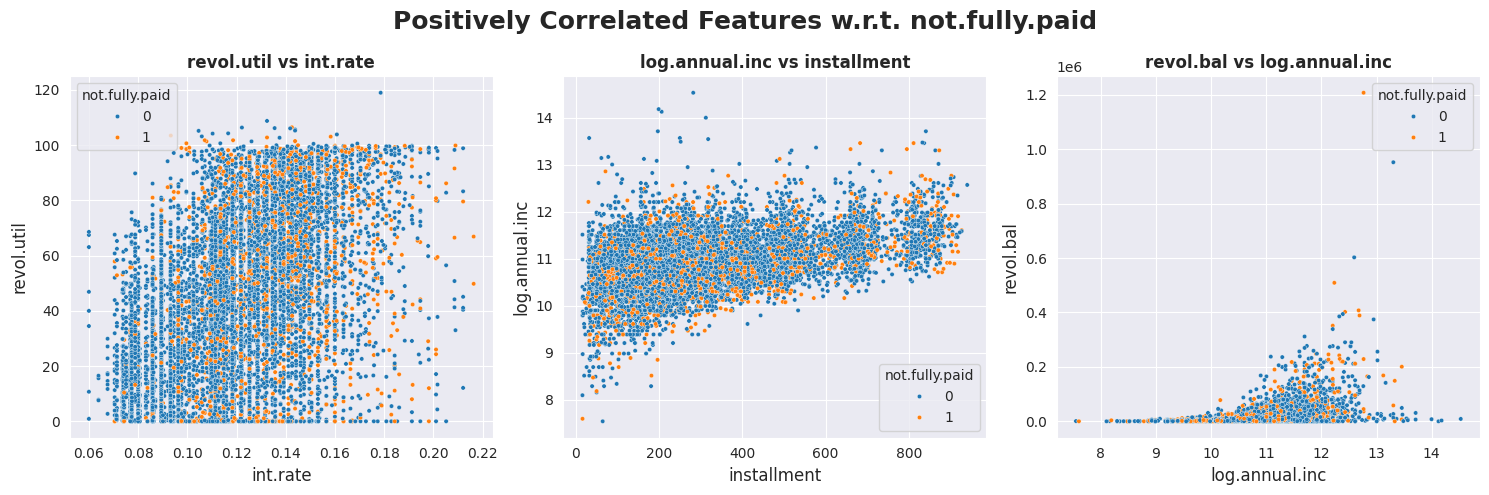

In [18]:
# Visualizations for positively correlated features

fig = plt.figure(figsize=(15, 5))
rows = 1
cols = 3
fontsize = 12

plot_feature_relations('int.rate', 'revol.util', rows, cols, 1, fontsize)
plot_feature_relations('installment', 'log.annual.inc', rows, cols, 2, fontsize)
plot_feature_relations('log.annual.inc', 'revol.bal', rows, cols, 3, fontsize)

fig.suptitle("Positively Correlated Features w.r.t. not.fully.paid", fontweight='bold', fontsize=18)
plt.tight_layout()
plt.show()

> **Visualizations for negatively correlated features**

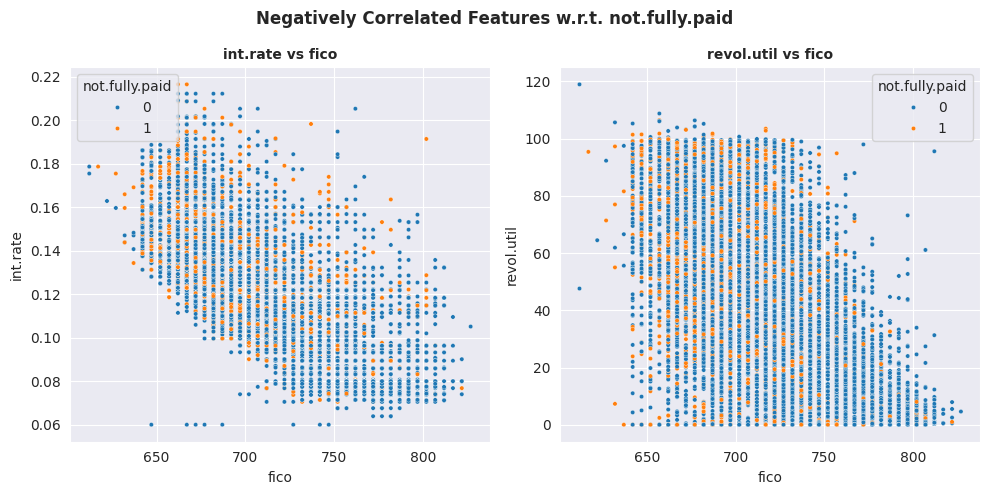

In [19]:
# Visualizations for negatively correlated features

fig = plt.figure(figsize=(10, 5))
rows = 1
cols = 2
fontsize = 10

plot_feature_relations('fico', 'int.rate', rows, cols, 1, fontsize)
plot_feature_relations('fico', 'revol.util', rows, cols, 2, fontsize)

fig.suptitle("Negatively Correlated Features w.r.t. not.fully.paid", fontweight='bold', fontsize=12)
plt.tight_layout()
plt.show()

> **Correlation of features with the target varible `not.fully.paid`:**


In [20]:
corr_target = pd.DataFrame(corr['not.fully.paid'].drop(index='not.fully.paid'))
corr_target

,not.fully.paid
credit.policy,-0.158119
int.rate,0.159552
installment,0.049955
log.annual.inc,-0.033439
dti,0.037362
fico,-0.149666
days.with.cr.line,-0.029237
revol.bal,0.053699
revol.util,0.082088
inq.last.6mths,0.149452


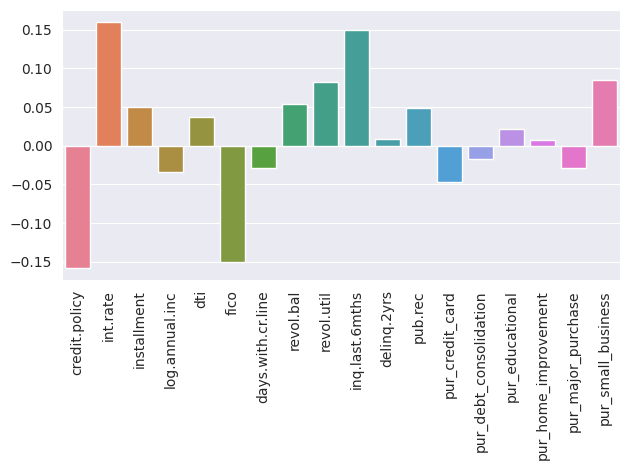

In [21]:
sns.barplot(corr_target.transpose())
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observations:**

> There are no strongly correlated features with the target variable `not.fully.paid`.

> Features moderately correlated with the target variable `not.fully.paid` are:

Feature | Corr |
--------|------|
`credit.policy` | `-0.16`|
`int.rate` | `0.16`|
`fico` | `-0.15` |
`inq.last.6mths` | `0.15` |
`revol.util` | `0.08` |
`pur_small_business` | `0.08` |
`installment` | `0.05` |
`pur_credit_card` | `-0.05` |

These features can be considered for modelling.

> Poorly correalted features with the target variable `not.fully.paid` are:

Feature | corr |
--------|------|
`delinq.2yrs` | `0.008`|
`pur_debt_consolidation`| `-0.017`|
`pur_home_improvement`|`0.007`|
`pub.rec`| `0.04`|
`pur_educational`|`0.02`|
`pur_major_purchase`|`-0.02`|
`days.with.cr.line`|`-0.029`|

The above features can be removed for modelling.

> **Drop the unnecessary features**

In [22]:
df.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'pur_credit_card', 'pur_debt_consolidation', 'pur_educational',
       'pur_home_improvement', 'pur_major_purchase', 'pur_small_business'],
      dtype='object')

In [23]:
df.drop(columns=['delinq.2yrs',
                 'pur_debt_consolidation',
                 'pur_home_improvement',
                 'pub.rec', 'pur_educational',
                'pur_major_purchase', 'days.with.cr.line'], inplace=True)
df.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'revol.bal', 'revol.util', 'inq.last.6mths', 'not.fully.paid',
       'pur_credit_card', 'pur_small_business'],
      dtype='object')

> **Boxplots of Features w.r.t. the Target Variable `not.fully.paid`:**

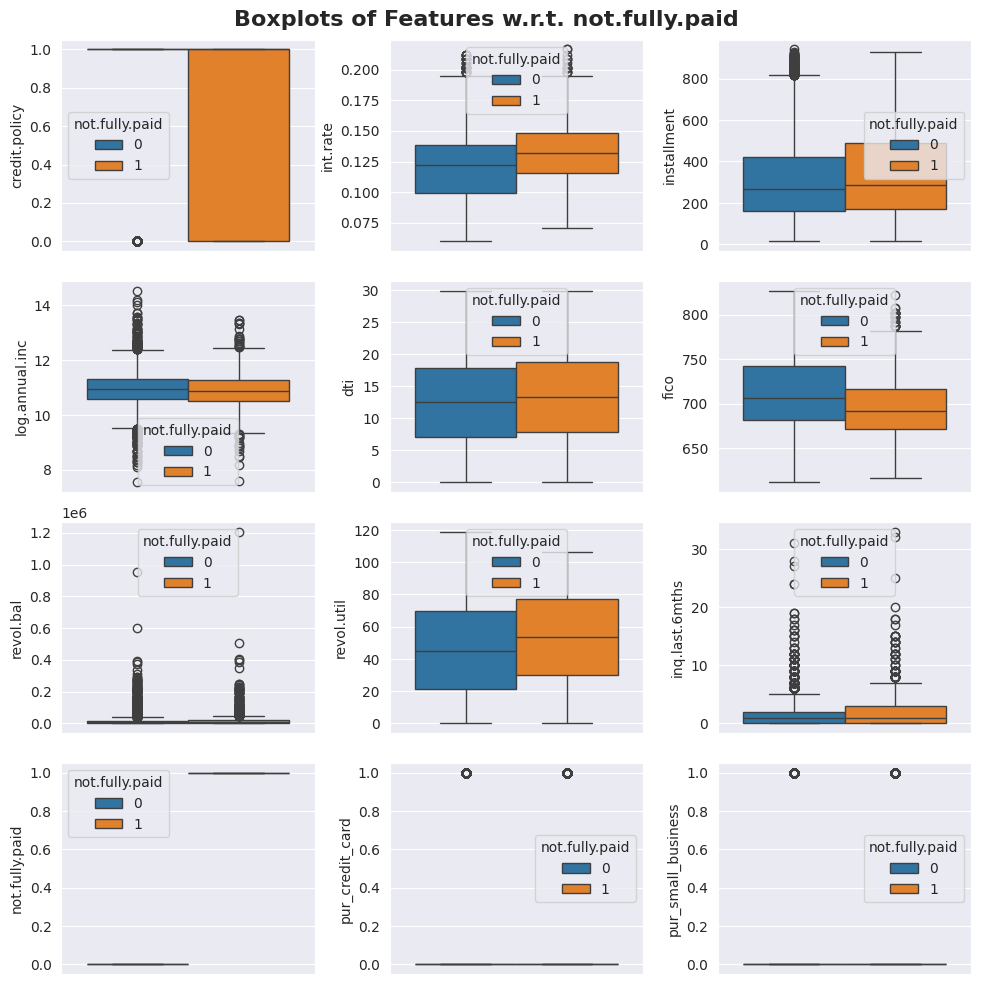

In [24]:
# Visualize box plots

fig = plt.figure(figsize=(10, 10))
rows = 4
cols = 3

for i, feature in enumerate(df.columns):
  plt.subplot(rows, cols, i + 1)
  sns.boxplot(y=df[feature], hue=df['not.fully.paid'])

fig.suptitle("Boxplots of Features w.r.t. not.fully.paid", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

> **Check for data imbalance**

In [25]:
df.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'revol.bal', 'revol.util', 'inq.last.6mths', 'not.fully.paid',
       'pur_credit_card', 'pur_small_business'],
      dtype='object')

In [26]:
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64

<Axes: xlabel='not.fully.paid', ylabel='percent'>

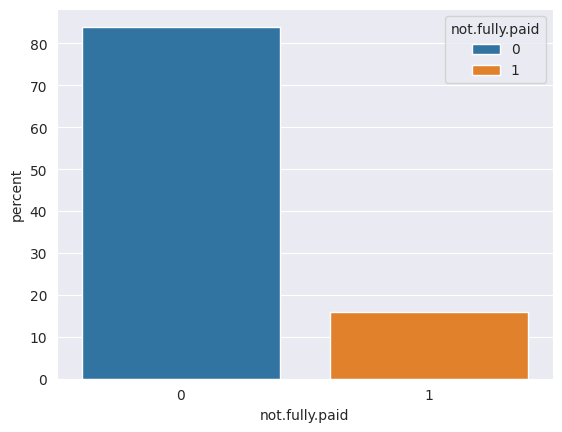

In [27]:
sns.countplot(df, x='not.fully.paid', stat='percent', hue='not.fully.paid')

Data is imbalanced. Data needs to be balanced.

> **Balance the Data**

In [28]:
from sklearn.utils import resample

notfullypaid1_upsampled = resample(df[df['not.fully.paid']==1], replace=True, n_samples = 8045)

df = pd.concat([df[df['not.fully.paid']==0], notfullypaid1_upsampled])
df['not.fully.paid'].value_counts()

not.fully.paid
0    8045
1    8045
Name: count, dtype: int64

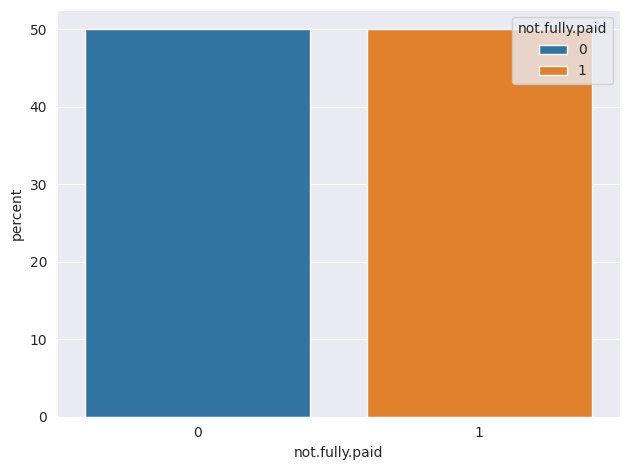

In [29]:
sns.countplot(df, x="not.fully.paid", stat='percent', hue='not.fully.paid')
plt.tight_layout()
plt.show()

Now, data is balanced.

## Modelling

> Split the data into `train` and `test` datasets.

In [30]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['not.fully.paid'])
y = df['not.fully.paid']

# train=0.8, test=0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) # train=0.8, test=0.2

In [31]:
total_samples = len(X_train) + len(X_test)

print(f"{'Total samples':20s} {':':5s} {total_samples}")
print(f"{'Training samples':20s} {':':5s} {len(X_train)}")
print(f"{'Testing samples':20s} {':':5s} {len(X_test)}")

print("\nPercentages")
print("===========")
print(f"Train : {round(100*(len(X_train)/total_samples))}%")
print(f"Test  : {round(100*(len(X_test)/total_samples))}%")

Total samples        :     16090
Training samples     :     12872
Testing samples      :     3218

Percentages
Train : 80%
Test  : 20%


> Standardize the train data. Apply the same transform to the test dataset.

In [32]:
from sklearn.preprocessing import StandardScaler

standardscaler = StandardScaler()

X_train = standardscaler.fit_transform(X_train)
X_test = standardscaler.transform(X_test)

> Import necessary libraries for modelling.

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout
from keras.callbacks import EarlyStopping

> Use batch size, epochs and validation split as `256`, `1000` and `0.05` respectively.

In [34]:
BATCH_SIZE = 256
EPOCHS = 1000
VAL_SPLIT = 0.05

> Define compiler for the model.

In [35]:
def compile_model(model):
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),
                loss=keras.losses.BinaryCrossentropy(),
                metrics='accuracy')

> Define training parameters with the `callback` option as `EarlyStopping` using `validation accuracy`.

In [36]:
def train_model(model, train_data, train_labels):
  callback = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=100)
  return model.fit(train_data, train_labels,
                   batch_size=BATCH_SIZE,
                   epochs=EPOCHS,
                   validation_split=VAL_SPLIT,
                   shuffle=True,
                   callbacks=[callback],
                   verbose=1)

> Define evaluator for the model.

In [37]:
def evaluate_model(model):
  model.evaluate(X_test, y_test, batch_size=BATCH_SIZE)

> Define the model.

In [38]:
# Define the model
model = Sequential([Dense(256, input_shape=(X_train.shape[-1],), activation='relu'),
                    BatchNormalization(axis=1),
                    Dropout(0.1),
                    Dense(256, activation='relu'),
                    BatchNormalization(axis=1),
                    Dropout(0.1),
                    Dense(1, activation= 'sigmoid')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3072      
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 256)               0

> Compile, Train and Test the model.

In [39]:
# Compile the model
compile_model(model)

# Train the model
history = train_model(model, X_train, y_train)

# Evaluate the model
evaluate_model(model)

Epoch 1/1000
48/48 [==============================] - 3s 15ms/step - loss: 0.7284 - accuracy: 0.5876 - val_loss: 0.6817 - val_accuracy: 0.5202
Epoch 2/1000
48/48 [==============================] - 0s 9ms/step - loss: 0.6557 - accuracy: 0.6229 - val_loss: 0.7026 - val_accuracy: 0.4938
Epoch 3/1000
48/48 [==============================] - 0s 9ms/step - loss: 0.6376 - accuracy: 0.6322 - val_loss: 0.6990 - val_accuracy: 0.4984
Epoch 4/1000
48/48 [==============================] - 0s 9ms/step - loss: 0.6270 - accuracy: 0.6456 - val_loss: 0.6904 - val_accuracy: 0.5186
Epoch 5/1000
48/48 [==============================] - 0s 9ms/step - loss: 0.6187 - accuracy: 0.6562 - val_loss: 0.6781 - val_accuracy: 0.5450
Epoch 6/1000
48/48 [==============================] - 0s 10ms/step - loss: 0.6124 - accuracy: 0.6645 - val_loss: 0.6656 - val_accuracy: 0.5854
Epoch 7/1000
48/48 [==============================] - 0s 10ms/step - loss: 0.6077 - accuracy: 0.6621 - val_loss: 0.6463 - val_accuracy: 0.6102
Epo

> Plot accuracy of the model while training on `train` and `validation` datasets.

In [40]:
def plot_accuracy(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'], hist['accuracy'],
            label='Train Accuracy')
  plt.plot(hist['epoch'], hist['val_accuracy'],
            label = 'Val Accuracy')
  plt.ylim((0, 1))
  plt.legend()
  plt.show()

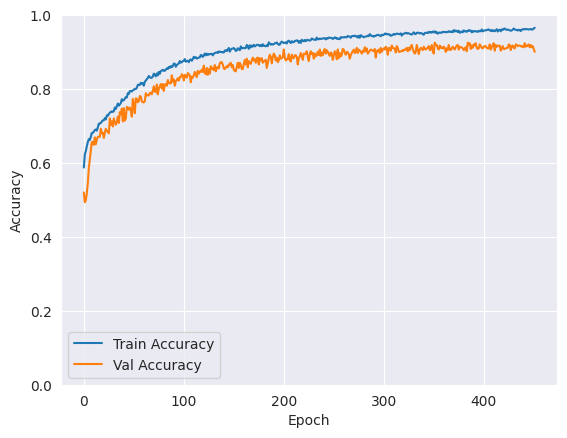

In [41]:
plot_accuracy(history)

> Evaluate the model

In [42]:
evaluate_model(model)

13/13 [==============================] - 0s 4ms/step - loss: 0.3485 - accuracy: 0.9080


## Conclusion

**Lending Club Loan Data Analysis:**

I've followed the below steps to analyse the Lending Club Loan Data.

1. **Data Preparation:**
I've prepared the Lending Club loan data by addressing missing, null, and duplicate values, resulting in a dataset free of such issues.

2. **Exploratory Data Analysis (EDA):**
During the exploration phase, I delved into the relationships among various features, aiming to uncover meaningful insights and patterns within the dataset.

3. **Feature Engineering:**
I've refined existing ones based on their correlation with the target variable, a critical step in enhancing the predictive power of machine learning models.

4. **Feature Selection:**
Through careful analysis, I pruned unnecessary features from the dataset, streamlining the model and mitigating the risk of overfitting.

5. **Handling Imbalanced Data:**
To address the imbalance in the data, I employed resampling techniques, ensuring a more equitable representation of different classes in the training process.

6. **Modelling:**
I partitioned the dataset into `train` and `test` sets for model training and evaluation. Additionally, I standardized the training data to ensure uniformity across features and applied the same transformations to the `test` data to prevent data leakage. Furthermore, I created a `validation` dataset from `train` dataset to fine-tune model parameters.

7. **Model Evaluation:**
The model yielded an impressive accuracy of `91%`, underscoring its proficiency in predicting loan outcomes accurately.